# Rapport sur la voie lactée et la matière noire 

## Compréhension du sujet :

Pour bien situer le sujet il est nécessaire de comprendre ce qu'est la radiosastronomie et les coordonnées galactiques ainsi que la spectroscopie de l'hydrogène neutre.

La spectroscopie est une méthode essentielle à l'astrophysique pour mieux connaître les objets célestes de notre galaxie. Il s'agit d'étudier le spectre d'un phénomène ou d'un objet physique afin d'en déterminer les caractéristiques (composition, température, distance). 
L'hydrogène étant le constituant principal de l'univers et donc du milieu interstellaire des galaxies, l'étude de son spectre apporte de préciseuses informations sur les objets présents dans la voie Lactée. L'atome d'hydrogène neutre étant froid aucune transition électronique ne peut se produire, aucune lumière n'est émise, le nuage n'est donc pas visible. Le seul moment où celui-ci est détectable est lorsqu'il est situé devant une source lumineuse intense, telle qu'un ensemble d'étoile. C'est la découverte de la radioastronomie qui a permis d'observer l'hydrogène atomique sous sa forme neutre, en effet le nuage émet des ondes radios dont le spectre est une raie unique de 21 cm. 

La méthode par radioastronomie est née au 19éme siècle. Elle consiste à observer l’espace et les différents phénomènes grâce aux longueurs d’ondes. Chaque étoile émet des rayonnements qui nous permettront d'accéder aux caractéristiques des étoiles, de nuages de gaz grâce à l'étude du spectre.  Pour cela il faut utiliser un radio télescope qui va détecter les émissions radios. Ainsi grâce a ces mesures nous allons pouvoir à la fois étudier la cinématique et la répartition de gaz dans la voie lactée. 


- Qu'est ce que la matière noire ?
- Où se trouve la prinicpale masse dans la Voie lactée?
- Comment expliquer les différences entre les vitesses orbitales théoriques et les vitesses orbitales observées?


    

l:15°,30°,45°,60°,75°
Vr(km/s)!140, 100, 60, 30, 0
R0=220
v0=8.5
V=197,210,215,220,212
R=2.19, 4.25,6.01,7.36, 8.2


In [49]:
%matplotlib inline
from pylab import *
import numpy as np

def vitessegaz(longitude, vitesserad):
    
    #vitesse du Soleil autour du centre galactique en (km/s)
    v0=220
    #Distance entre le soleil et le centre galactique(kpc, 1 pc=3.09*10**6m)
    R0=8.5
  
    #vitesses orbitales
    V=0
    #Distance entre le nuage et le centre galactique
    R=0
    
    V=vitesserad+v0*sin(math.radians(longitude))
    R=R0*sin(math.radians(longitude))
    
    
    return (R, V)

vitessegaz(15,140)

vitessegaz(60,30)
vitessegaz(75,0)

(8.2103695234570804, 212.50368178359503)

In [50]:
vitessegaz(45,60)

(6.0104076400856536, 215.56349186104043)

In [46]:
vitessegaz(30,100)

(4.2499999999999991, 210.0)

In [47]:
import numpy as np
Vr,T=np.loadtxt('spectre.txt',usecols=(0,1),unpack=True)
Vr,T

(array([ -55.,  -32.,  -16.,    2.,   26.,   34.,   44.,   57.,   70.,
          78.,   89.,   93.,  107.,  130.]),
 array([   1.63,   36.84,   57.17,   52.6 ,   96.68,   78.13,   96.46,
          77.17,   86.4 ,   92.65,   96.75,  101.45,   92.73,    1.18]))

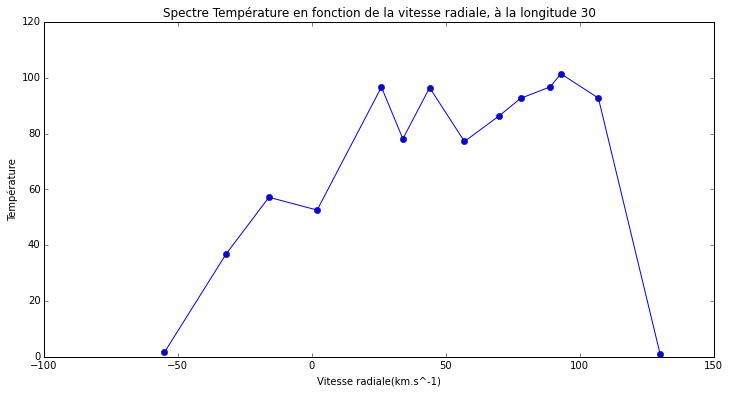

In [48]:
%matplotlib inline
from pylab import *
figure(figsize=(12,6), dpi=80)
plot(Vr, T, 'bo-')
plt.title("Spectre Température en fonction de la vitesse radiale, à la longitude 30")
plt.xlabel('Vitesse radiale(km.s^-1)')
plt.ylabel('Température ')
show()
